In [1]:
import numpy as np

inputs = [[1, 2, 3, 2.5],
          [2., 5., -1., 2],
          [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]

layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
print(layer2_outputs)


[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


In [2]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

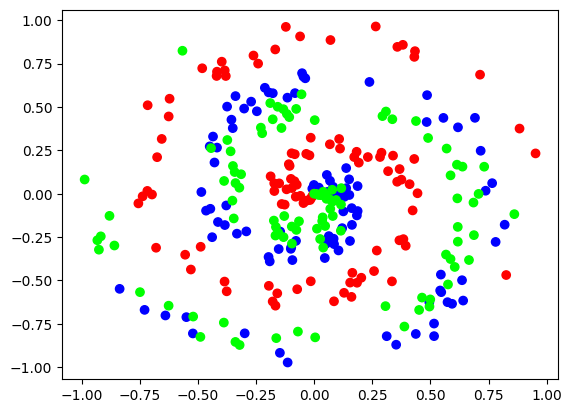

In [60]:
import matplotlib.pyplot as plt

X, y = spiral_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

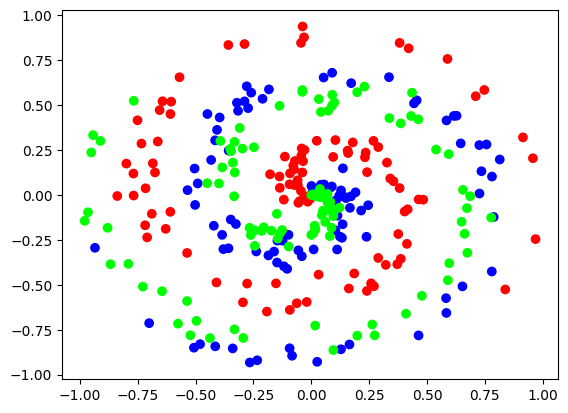

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

In [5]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

# Dense layer
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Let's see output of the first few samples:
print(dense1.output[:5])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]


In [6]:
import numpy as np
import nnfs

nnfs.init()

n_inputs = 2
n_neurons = 4

weights = 0.01 * np.random.randn(n_inputs, n_neurons)
biases = np.zeros((1, n_neurons))

print(weights)
print(biases)

[[ 0.01764052  0.00400157  0.00978738  0.02240893]
 [ 0.01867558 -0.00977278  0.00950088 -0.00151357]]
[[0. 0. 0. 0.]]


In [7]:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]

output = []
for i in inputs:
    if i > 0:
        output.append(i)
    else:
        output.append(0)

print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [8]:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]

output = []
for i in inputs:
    output.append(max(0, i))

print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [9]:
import numpy as np

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = np.maximum(0, inputs)
print(output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [10]:
# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from input
        self.output = np.maximum(0, inputs)

In [11]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Make a forward pass of our training data through this layer
dense1.forward(X)

# Forward pass through activation func.
# Takes in output from previous layer
activation1.forward(dense1.output)

# Let's see output of the first few samples:
print(activation1.output[:5])

[[0.         0.         0.        ]
 [0.00012493 0.         0.        ]
 [0.00024753 0.         0.        ]
 [0.00034834 0.         0.        ]
 [0.00050621 0.         0.        ]]


In [12]:
# Values from the previous output when we described
# what a neural network is
layer_outputs = [4.8, 1.21, 2.385]

# e - mathematical constant, we use E here to match a common coding
# style where constants are uppercased
E = 2.71828182846 # you can also use math.e

# For each value in a vector, calculate the exponential value
exp_values = []
for output in layer_outputs:
    exp_values.append(E ** output) # ** - power operator in Python
print('exponentiated values:')
print(exp_values)

exponentiated values:
[121.51041751893969, 3.3534846525504487, 10.85906266492961]


In [13]:
# Now normalize values
norm_base = sum(exp_values) # We sum all values
norm_values = []
for value in exp_values:
    norm_values.append(value / norm_base)
print('Normalized exponentiated values:')
print(norm_values)

print('Sum of normalized values:', sum(norm_values))

Normalized exponentiated values:
[0.8952826639573506, 0.024708306782070668, 0.08000902926057876]
Sum of normalized values: 1.0


In [14]:
import numpy as np

# Values from the earlier previous when we described
# what a neural network is
layer_outputs = [4.8, 1.21, 2.385]

# For each value in a vector, calculate the exponential value
exp_values = np.exp(layer_outputs)
print('exponentiated values:')
print(exp_values)

# Now normalize values
norm_values = exp_values / np.sum(exp_values)
print('normalized exponentiated values:')
print(norm_values)
print('sum of normalized values:', np.sum(norm_values))

exponentiated values:
[121.51041752   3.35348465  10.85906266]
normalized exponentiated values:
[0.89528266 0.02470831 0.08000903]
sum of normalized values: 0.9999999999999999


In [15]:
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs):
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
        keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
        keepdims=True)
        self.output = probabilities

In [16]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)
# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()
# Make a forward pass of our training data through this layer
dense1.forward(X)

# Make a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)
# Make a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Make a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)
# Let's see output of the first few samples:
print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333358 0.33333343 0.33333305]
 [0.33333376 0.3333335  0.33333275]
 [0.33333397 0.33333355 0.33333242]
 [0.33333415 0.33333367 0.33333215]]
